<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Filter Methods: Using Correlation**
To select features based on their correlation with the target variable, you can use pandas and scipy to compute correlation and select the most relevant features.

In [ ]:
import pandas as pd

# Load dataset
file_path = "/mnt/data/example_dataset.csv"
df = pd.read_csv(file_path)
df.head()

# Check for missing values
print(df.isnull().sum())

# Imputation methods
df['Feature1_mean'] = df['Feature1'].fillna(df['Feature1'].mean())
df['Feature1_median'] = df['Feature1'].fillna(df['Feature1'].median())
df['Feature1_mode'] = df['Feature1'].fillna(df['Feature1'].mode()[0])

df.head()

In [2]:

from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['Target'] = cancer.target

# Display the first few rows of the dataset
data.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Wrapper Method (Recursive Feature Elimination)**
As shown earlier, Recursive Feature Elimination (RFE) can be used to find the best subset of features by evaluating model performance.

In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2)
rfe.fit(data.drop(columns='Target'), data['Target'])

selected_features = data.drop(columns='Target').columns[rfe.support_].tolist()
print("Selected Features with RFE:", selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features with RFE: ['worst compactness', 'worst concavity']


**Tree-Based Feature Importance**
Tree-based models like Random Forests and Decision Trees can provide feature importances, which can be useful for feature selection.

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(data.drop(columns='Target'), data['Target'])

feature_importances = model.feature_importances_
fi_df = pd.DataFrame({'Feature': data.drop(columns='Target').columns, 'Importance': feature_importances})
selected_features = fi_df[fi_df['Importance'] > 0]['Feature'].tolist()

print("Feature Importances:\n", fi_df)
print("Selected Features:", selected_features)


Feature Importances:
                     Feature  Importance
0               mean radius    0.038908
1              mean texture    0.015920
2            mean perimeter    0.058343
3                 mean area    0.044002
4           mean smoothness    0.006795
5          mean compactness    0.011882
6            mean concavity    0.044535
7       mean concave points    0.106779
8             mean symmetry    0.004278
9    mean fractal dimension    0.003627
10             radius error    0.010787
11            texture error    0.005010
12          perimeter error    0.015846
13               area error    0.035042
14         smoothness error    0.003553
15        compactness error    0.005284
16          concavity error    0.003742
17     concave points error    0.007619
18           symmetry error    0.003922
19  fractal dimension error    0.003881
20             worst radius    0.130281
21            worst texture    0.017162
22          worst perimeter    0.125268
23               w

**Sample Dataset**
Consider a dataset with three features, where Feature1 and Feature2 are correlated with the target variable, and Feature3 is just random noise:

**Embedded Methods for Feature Selection**

Lasso Regression (L1 Regularization)
•Description: Adds an L1 penalty to the cost function, reducing the coefficients of less important features to zero, effectively selecting features.
•Use Case: Linear models where feature selection is required.
Ridge Regression (L2 Regularization) with Coefficient Thresholding
•Description: While Ridge doesn’t directly select features, setting a threshold on the coefficient magnitude can act as a form of feature selection.
•Use Case: Linear models needing stable but minimally impactful features.
Elastic Net (Combination of L1 and L2 Regularization)
•Description: Combines L1 (for feature selection) and L2 (for stability) penalties, allowing for both feature selection and shrinkage.
Use Case: Linear models, especially when features are correlated

In [6]:

from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['Target'] = cancer.target

# Display the first few rows of the dataset
data.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**1. Lasso Regression (L1 Regularization)**

Lasso (L1) adds a penalty that can shrink some coefficients to zero, effectively performing feature selection.

In [10]:
from sklearn.linear_model import Lasso # Import the Lasso class
lasso = Lasso(alpha=0.1)
lasso.fit(data.drop(columns='Target'), data['Target'])

print("Lasso Coefficients:", lasso.coef_)



Lasso Coefficients: [-0.         -0.         -0.          0.00031783 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.00027708 -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.01109836 -0.01982     0.00039047
 -0.         -0.         -0.         -0.         -0.         -0.        ]


All Coefficients:
                    Feature  Coefficient
0               mean radius    -0.000000
14         smoothness error    -0.000000
28           worst symmetry    -0.000000
26          worst concavity    -0.000000
25        worst compactness    -0.000000
24         worst smoothness    -0.000000
23               worst area    -0.000000
22          worst perimeter    -0.000000
19  fractal dimension error    -0.000000
18           symmetry error    -0.000000
17     concave points error    -0.000000
16          concavity error    -0.000000
1              mean texture    -0.000000
15        compactness error    -0.000000
13               area error    -0.000000
12          perimeter error    -0.000000
11            texture error    -0.000000
10             radius error    -0.000000
9    mean fractal dimension     0.000000
8             mean symmetry    -0.000000
6            mean concavity    -0.000000
5          mean compactness    -0.000000
4           mean smoothness    -0.00000

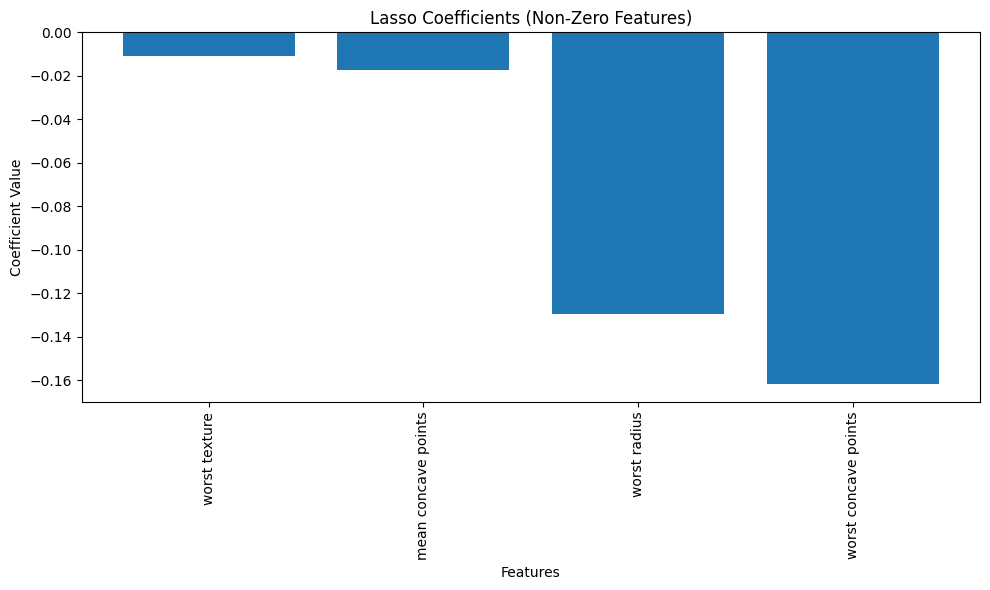

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Example Dataset (Replace this with your actual data)
# Ensure 'Target' is the name of your target column
# data = your_dataframe

# Step 1: Scale the data for better Lasso performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns='Target'))
y = data['Target']

# Step 2: Fit the Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

# Step 3: Create a DataFrame for coefficients with feature names
feature_names = data.drop(columns='Target').columns
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso.coef_
})

# Step 4: Sort coefficients by importance (descending order)
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Step 5: Display all coefficients
print("All Coefficients:")
print(coefficients)

# Step 6: Filter and display non-zero coefficients
non_zero_coefficients = coefficients[coefficients['Coefficient'] != 0]
print("\nNon-Zero Coefficients (Selected Features):")
print(non_zero_coefficients)

# Step 7: Filter and display dropped features
dropped_features = coefficients[coefficients['Coefficient'] == 0]
print("\nDropped Features:")
print(dropped_features)

# Step 8: Plot non-zero coefficients for visualization
plt.figure(figsize=(10, 6))
plt.bar(non_zero_coefficients['Feature'], non_zero_coefficients['Coefficient'])
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients (Non-Zero Features)')
plt.tight_layout()
plt.show()


**2. Ridge Regression (L2 Regularization)**

Ridge (L2) applies a penalty proportional to the square of the coefficients, shrinking them but not setting them to zero.

Explanation:

Expected Outcome: All coefficients are shrunk toward zero, but none are exactly zero. This regularization helps manage multicollinearity but keeps all features in the model.

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(data.drop(columns='Target'), data['Target'])

print("Ridge Coefficients:", ridge.coef_)

Ridge Coefficients: [ 8.60973540e-02 -8.72709418e-03  1.51841248e-03 -7.16939409e-04
 -2.19901882e-01  1.16191973e+00 -5.62003041e-01 -9.74170158e-01
 -5.31690240e-02  3.93618929e-02 -4.38796915e-01 -2.38827433e-02
  6.36777729e-03  1.42039400e-03 -4.13468952e-01  1.62269511e-01
  1.27191830e+00 -2.12546894e-01 -2.04375307e-01 -2.52173120e-03
 -1.99121519e-01 -3.85565762e-03  3.30993738e-03  1.03609005e-03
 -1.28220720e+00  3.82895603e-02 -3.49799216e-01 -1.25214540e+00
 -5.44272498e-01 -6.13238804e-01]


**3. Elastic Net (Combination of L1 and L2 Regularization)**

Elastic Net combines both L1 and L2 penalties, allowing for feature selection (L1 effect) and shrinkage (L2 effect).

**# Explanation: **

Expected Outcome: Some coefficients may be reduced to zero (like Lasso), while others are shrunk but kept (like Ridge). This combination is useful when you want both feature selection and stability.

In [17]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio balances L1 and L2
elastic_net.fit(data.drop(columns='Target'), data['Target'])
print("Elastic Net Coefficients:", elastic_net.coef_)


Elastic Net Coefficients: [-0.         -0.         -0.          0.00034609 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.00049707 -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.01245821 -0.0210556   0.00046449
 -0.         -0.         -0.         -0.         -0.         -0.        ]


**Demonstrating Feature Selection and Importance Using Tree-Based Models and Regularized Logistic Regression**

In [18]:

from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['Target'] = cancer.target

# Display the first few rows of the dataset
data.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
